## 5.3　モデル適合を改善する

In [1]:
import copy
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

#### 5.3.1　勾配降下法の重要なパラメータを調整する

In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer=keras.optimizers.RMSprop(1.), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 10s 23ms/step - loss: 704.3691 - accuracy: 0.3448 - val_loss: 3.1127 - val_accuracy: 0.2579
Epoch 2/10
375/375 [==============================] - 8s 20ms/step - loss: 2.6473 - accuracy: 0.2116 - val_loss: 2.1955 - val_accuracy: 0.2457
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 2.5964 - accuracy: 0.2042 - val_loss: 2.2873 - val_accuracy: 0.1656
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 2.6304 - accuracy: 0.1843 - val_loss: 2.2423 - val_accuracy: 0.2046
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 2.6108 - accuracy: 0.1748 - val_loss: 2.1796 - val_accuracy: 0.1817
Epoch 6/10
375/375 [==============================] - 6s 16ms/step - loss: 2.3589 - accuracy: 0.1706 - val_loss: 2.4542 - val_accuracy: 0.1146
Epoch 7/10
375/375 [==============================] - 5s 12ms/step - loss: 2.3564 - accuracy: 0.1639 - val_loss: 2.7210 - val_accuracy: 0.2

In [3]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3444 - accuracy: 0.9129 - val_loss: 0.1395 - val_accuracy: 0.9605
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1259 - accuracy: 0.9647 - val_loss: 0.1246 - val_accuracy: 0.9653
Epoch 3/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0946 - accuracy: 0.9744 - val_loss: 0.1632 - val_accuracy: 0.9633
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0790 - accuracy: 0.9793 - val_loss: 0.1389 - val_accuracy: 0.9722
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0722 - accuracy: 0.9830 - val_loss: 0.1755 - val_accuracy: 0.9709
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0627 - accuracy: 0.9852 - val_loss: 0.1678 - val_accuracy: 0.9741
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0519 - accuracy: 0.9874 - val_loss: 0.1972 - val_accuracy: 0.9716


### 5.3.3　モデルのキャパシティを増やす

In [4]:
model = keras.Sequential([layers.Dense(10, activation='softmax')])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_small_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6642 - accuracy: 0.8368 - val_loss: 0.3591 - val_accuracy: 0.9057
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3531 - accuracy: 0.9034 - val_loss: 0.3086 - val_accuracy: 0.9149
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3183 - accuracy: 0.9111 - val_loss: 0.2933 - val_accuracy: 0.9183
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3024 - accuracy: 0.9153 - val_loss: 0.2852 - val_accuracy: 0.9200
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2923 - accuracy: 0.9186 - val_loss: 0.2822 - val_accuracy: 0.9227
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.9200 - val_loss: 0.2757 - val_accuracy: 0.9242
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2809 - accuracy: 0.9213 - val_loss: 0.2726 - val_accuracy: 0.9247
Epoch 

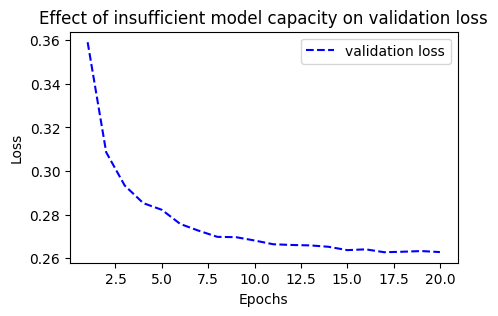

In [5]:
val_loss = history_small_model.history['val_loss']
epochs = range(1, 21)
plt.figure(figsize=(5, 3))
plt.plot(epochs, val_loss, 'b--', label='validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [6]:
model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_large_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3699 - accuracy: 0.8959 - val_loss: 0.1968 - val_accuracy: 0.9422
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1664 - accuracy: 0.9501 - val_loss: 0.1477 - val_accuracy: 0.9561
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1167 - accuracy: 0.9652 - val_loss: 0.1149 - val_accuracy: 0.9663
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0913 - accuracy: 0.9724 - val_loss: 0.1135 - val_accuracy: 0.9670
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0719 - accuracy: 0.9787 - val_loss: 0.1050 - val_accuracy: 0.9696
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0603 - accuracy: 0.9812 - val_loss: 0.1048 - val_accuracy: 0.9693
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0994 - val_accuracy: 0.9736
Epoch 

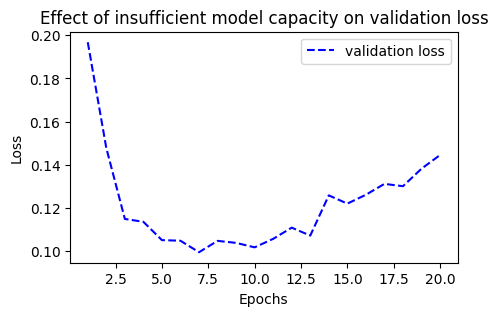

In [7]:
val_loss = history_large_model.history['val_loss']
epochs = range(1, 21)
plt.figure(figsize=(5, 3))
plt.plot(epochs, val_loss, 'b--', label='validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()